<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M1_AST_02_Linear_Algebra_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 2: Linear Algebra

## Learning Objectives

At the end of the assignment, you will be able to

*   understand rank of a matrix
*   understand pseudo inverse of matrix
*   understand vector and matrix norm
* perform various matrix calculus operations using Python
* implement SVD (Singular Value Decomposition) using Python



### Setup Steps:

In [60]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200023" #@param {type:"string"}

In [61]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [62]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_02_Linear_Algebra_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the required libraries

In [63]:
import numpy as np
import scipy
import sympy as sym
import matplotlib.pyplot as plt
from sympy.abc import x, y,z

### Rank of a Matrix


**Rank of a matrix**: - The rank of a matrix is defined as the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix.



**Full Row Rank**:- If the rank of a matrix is equal to the number of row in the matrix, then matrix has a Full Row Rank.

**Full Column Rank**:- If the rank of a matrix is equal to the number of columns in the matrix, then matrix has Full Column Rank.


**Rank Deficient**:-When the rank of a matrix is less than the number of rows and columns in the matrix, then the matrix is Rank Deficient.

**Uses**:-
It is useful in understanding whether we have a chance of solving a system of linear equations or not. Further, if rank is equal to the number of variables we will be able to find a unique solution.


1. Create a random matrix and find the rank of it.



In [64]:
matrix_a = np.random.randint(10, size= (2, 4)) # creating a matrix
rank_a = np.linalg.matrix_rank(matrix_a) # finding the rank of a matrix.
print("The rank of the a matrix is :",rank_a )

The rank of the a matrix is : 2


### Pseudo Inverse of Matrix


**Pseudo Inverse of Matrix**:-Pseudo inverse is unique for all matrices whose entries are real or complex numbers.It is represented as $A^{+}$ of a matrix $A$.



Let $A$ be a matrix of order m x n then the pseudo inverse of A is defined as 
*	If the rows are linearly independent then the pseudo inverse of A is:
$A^{+}$  = $(A A^{T})^{-1}$. $A^{T}$ 
*	If the columns are linearly independent, then the pseudo inverse of A is:
$A^{+}$ = $A^{+}$.$(A A^{+})^{-1}$
*	If A is rank deficient, then the pseudo inverse of A is defined as 
$A^{+}$ = $(UΣV^{T})^{-1}=(V^{T})^{-1}Σ^{-1}U^{-1}=V^{-1}ΣU^{T}$



Pseudo inverse of a matrix is used:
1.   To solve Linear Equations using the Moore-Penrose Pseudoinverse.
2.   For overdetermined systems(where an equation has no perfect solution but by using this we can get approximate solution)
3.   To find least square solution in the triangle center.
4.   To rearrange the original data from the decomposed data.


1. Solve the matrix ${A}=\begin{bmatrix}
    7 & 8\\\\
    8 & 9\\\\
    6 & 5
\end{bmatrix}$ by the pseudo inverse formula and verify the result.

  To know more about pueudo inverse operations click [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)


In [65]:
A = np.array([[7, 8], [8, 9], [6, 5]]) # creating the matrix

U, Sigma, V = np.linalg.svd(A) # implementing the singular vector decomposition

Sigma_plus = np.zeros((A.shape[0], A.shape[1])).T # creating a matrix of shape transpose(matrix A)

Sigma_plus[:Sigma.shape[0], :Sigma.shape[0]] = np.linalg.inv(np.diag(Sigma)) # Creating the inverse of matrix Sigma

A_plus = V.T.dot(Sigma_plus).dot(U.T) # creating a pseudo inverse A 
print("The pseudo invers of matrix A by calculating through formula is\n",A_plus)
print("The pseudo inverse of matrix A by function is \n",np.linalg.pinv(A))
if np.all(np.linalg.pinv(A)) == np.all(A_plus): 
  print("Your procedure is correct to find the pseudo inverse matrix")
else:
  print("Something went wrong in the calculation")

The pseudo invers of matrix A by calculating through formula is
 [[-0.20218579 -0.16939891  0.6284153 ]
 [ 0.23497268  0.21038251 -0.55464481]]
The pseudo inverse of matrix A by function is 
 [[-0.20218579 -0.16939891  0.6284153 ]
 [ 0.23497268  0.21038251 -0.55464481]]
Your procedure is correct to find the pseudo inverse matrix


2. Solve the following equation by using Pseudo inverse method:

  2x + y =2 

  4x - y = -8

  x + y = 2

  Hint: To solve the equation we need to follow the linear equation method i.e. $Ax=y$. 
  
  According to the above equations our matrices would be:
  
  ${A}=  \begin{bmatrix}
    2 &  1 \\\\
    4 & -1 \\\\
    1 &  1
\end{bmatrix}  {x}=
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}  {y}=
 \begin{bmatrix}
    2 \\\\
  -8 \\\\
    2
\end{bmatrix}$


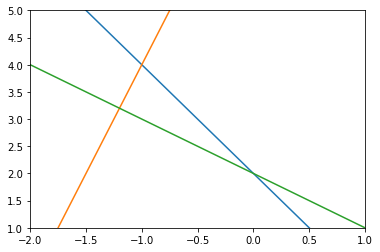

In [66]:
#plotting the equations 
x = np.linspace(-5, 5, 1000)
y_1 = -2*x + 2 
y_2 = 4*x + 8
y_3 = -1*x + 2

# plotting x and y
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

We can see that there are no solutions as the lines do not intersect with each other. Moreover, by using the pseudo-inverse method, we can get a pseudo solution. The solution obtained is an approximate solution but not an exact solution.

In [67]:
#defining a matrix
A = np.array([[2, 1], [4, -1], [1, 1]]) 
#finding the pseudo inverse
A_plus = np.linalg.pinv(A) 
A_plus 

array([[ 0.11290323,  0.17741935,  0.06451613],
       [ 0.37096774, -0.27419355,  0.35483871]])

In [68]:
# creating the matrix b 
b = np.array([[2], [-8], [2]])
# if we multiply pseudo inverse of A and b matrix we get a pseudo solution which might not be an exact solution 
result = A_plus.dot(b) 
result

array([[-1.06451613],
       [ 3.64516129]])

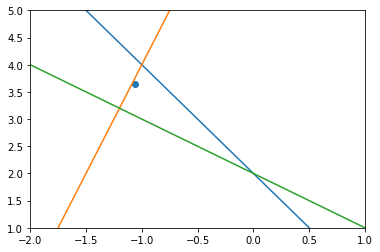

In [69]:
# plotting the equation and the result
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.scatter(result[0], result[1])
plt.show()

The point in the above plot is the resultant pseudo solution for the equations and we got it by using pseudo inverse method.

### Matrix and Vector Norms

**Matrix Norm**: The norm of a matrix is a measure of how large its elements are. It is a way of determining the “size” of a matrix that is not necessarily related to how many rows or columns the matrix has.

The norm of a square matrix A is a non-negative real number denoted $\left \| A \right \|$. There are several
different ways of defining a matrix norm, but they all share the following properties:
1. $\left \| A \right \|$ ≥ 0 for any square matrix A.
2. $\left \| A \right \|$ = 0 if and only if the matrix A = 0.
3. $\left \| kA \right \|$ = |k| $\left \| A \right \|$, for any scalar k.
4. $\left \| A+B \right \|$ ≤ $\left \| A \right \|$ + $\left \| B \right \|$.
5. $\left \| AB \right \|$ ≤ $\left \| A \right \|$ $\left \| B \right \|$.

Below is the formula to calculate 1 norm of a matrix:

$\left \| A \right \|_{1} = \max_{1≤j≤n} (\sum_{i}^{n} \left | a_{ij} \right |)$

By using this formula we compute the sum of absolute values down each column
and then take the largest number.



1. Calculate the 1-norm of a matrix $A =\begin{pmatrix}
    5 & -4 & 2\\
    -1 & 2 & 3\\
    -2 & 1 & 0\\
   \end{pmatrix}$. 

In [70]:
# Declaring a matrix
A = np.array([[ 5, -4, 2],
			[-1, 2, 3],
      [-2,1,0]])
# Norm of a matrix
matrix_norm = np.linalg.norm(A)
print("Norm of a Matrix A is:",matrix_norm)

Norm of a Matrix A is: 8.0


**Vector Norm**: The norm of a vector in vector space is a real non-negative value representing intuitively the length, size, or magnitude of the vector.

If $\vec{u} ∈\mathbb{R}^{n}$, then the Norm or Magnitude of $\vec{u}$ denoted $\left \| u \right \|$ is defined as the length or magnitude of the vector and can be calculated using the formula: 

$\left \| u \right \|= \sqrt{u_{1}^{2}+u_{2}^{2}+...+u_{n}^{2}}$.

1. Compute the norm of a given vector $A = [5,12]$.

In [71]:
# Declaring a matrix
vector = np.array([5,12])
# Norm of a vector
vector_norm = np.linalg.norm(vector)
print("Vector norm:",vector_norm)

Vector norm: 13.0


### Matrix Calculus



### 1. Dervatives w.r.t. Scalar

#### Scalar w.r.t Scalar





1. Differentiate the below given scalar function $f(x)$ w.r.t. to a scalar $x$.

  $ f(x) = \cos x + \sin x + x^2 $

In [72]:
# Declaring symbols that can be used as variables in the function
x = sym.Symbol('x')
# Defining a function 'f'
f = sym.Function('f')
f = sym.cos(x) + sym.sin(x) + x*x
# Derivative of the scalar function w.r.t. a scalar x using the 'diff' function of Sympy
ss_result = sym.diff(f,x)
ss_result

2*x - sin(x) + cos(x)

#### Vector w.r.t. Scalar

2. Differentiate the given vector $\vec{y}^{\,} = \begin{pmatrix}
    x^2 + 2x \\
    sinx \\
    cosx \\
   \end{pmatrix}$ w.r.t. a scalar $x$.

  Note: $Vector$ is a special case of $Matrix$




In [73]:
# Create a vector using Matrix
y_vector =  sym.Matrix([[x*x+2*x],[sym.sin(x)],[sym.cos(x)]]) 
# Differentiating y_vector w.r.t. a scalar x using diff() function
vs_result = y_vector.diff(x)
vs_result

Matrix([
[2*x + 2],
[ cos(x)],
[-sin(x)]])

#### Matrix w.r.t. Scalar

3. Find the derivative of the matrix $M = \begin{pmatrix}
    x^2 + 2x & cos(x)\\
    sin(x) & x^3+2x\\
   \end{pmatrix}$ w.r.t. a scalar $x$.




In [74]:
# Defining a matrix with the given values
M =  sym.Matrix([[x*x+2*x,sym.cos(x)],[sym.sin(x),x*x*x+2*x]])
# Differentiate the matrix M w.r.t. a scalar x
ms_result = M.diff(x)
ms_result

Matrix([
[2*x + 2,    -sin(x)],
[ cos(x), 3*x**2 + 2]])

Before moving ahead with more questions on derivatives w.r.t. vectors and matrices, you should have knowledge of "Partial Derivatives", "Jacobian Matrix" and "Numerator Layout Notation". 

### Partial Derivatives

Let us consider a function $f(x,y) = x^2 + y^2$ We can take a derivative of the changes in the function with respect to either x or y. We call these derivatives with respect to one variable partial derivatives. Let's give this a try by taking the derivative of $f(x,y)$ with respect to x. We write this partial derivative as follows.

$$\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x}$$

Since $f(x,y)$ is the sum of several simpler functions we need to take the partial derivative of each of these and sum the result. The first two parts are easy. $\frac{\partial x^2}{\partial x} = 2x$
Notice that we are following the usual rules of differentiation for any function of x here.

Now we need to take the partial derivative of the last part of $f(x,y)$, which does not depend on x at all. In these case we get the following $\frac{\partial y^2}{\partial x} = 0$
Now we can add up the parts to get the complete partail derivative of $f(x,y)$.

$$\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$$
We can also take the partial derivative of $f(x,y)$ with respect to y. The process proceeds in the following manner $\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$

### Jacobian Matrix

To test for functional dependence (both linear and non linear equations) between different equations we use Jacobian determinant shown by |j|. The Jacobian matrix is the first order derivatives of a vector valued function. Vector valued functions are defined as $f: \mathbb{R}^n \to \mathbb{R}^m$.

Given $x \in \mathbb{R}^n$ and $f_j : \mathbb{R}^n \to \mathbb{R}$ we have

$$f(x) = \begin{bmatrix}
    f_1(x) \\
    f_2(x) \\
    \vdots \\
    f_m(x)
\end{bmatrix}$$
 
 We could then define the jaccobian  as 
 
 $$J(x) = \begin{bmatrix}
    \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2}  & \dots  & \frac{\partial f_1}{\partial x_n} \\
    \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}  & \dots  & \frac{\partial f_2}{\partial x_n}  \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2}  & \dots  & \frac{\partial f_m}{\partial x_n} 
\end{bmatrix} $$
 
Hence each row represents the derivative of a real valued function with input vectors. Note that using shape convention we must reshape that to have the same output as the vector input. 

Let's find the derviate of function $f(x, y) = x + sin(y) $ with respect to x and y

In [75]:
x, y = sym.symbols("x, y") # declaring x and y as symbols
f = x + sym.sin(y) # Defining the function f(x, y)
print(f)

x + sin(y)


In [76]:
fx = f.diff(x) # Derivate w.r.t to 'x'
fy = f.diff(y) # Derivate w.r.t to 'y'

If we organize these partials into a horizontal vector, we get the gradient of f(x,y), or $\Delta$ f(x,y):

$ \Delta f(x,y)  = [\frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y}] = [1, cos(y)] $

In [77]:
gradientfxy = [fx, fy]
print(gradientfxy)

[1, cos(y)]


Now let's find the derviate of function $g(x, y) = sin(x) + y $ with respect to x and y

In [78]:
g = sym.sin(x) + y # Defining the function g(x, y)
print(g)

y + sin(x)


In [79]:
gx = g.diff(x) # Derivate w.r.t to 'x'
gy = g.diff(y) # Derivate w.r.t to 'y'

If we organize these partials into a horizontal vector, we get the gradient of g(x,y), or  Δ  g(x,y):

$ \Delta g(x,y)  = [\frac{\partial g(x,y)}{\partial x}, \frac{\partial g(x,y)}{\partial y}] = [cos(x), 1] $

In [80]:
gradientgxy = [gx, gy]
print(gradientgxy)

[cos(x), 1]


If we organize the gradients of *f(x, y) and g(x, y)* into a single matrix, we move from vector calculus into matrix calculus. This matrix, and organization of the gradients of multiple functions with multiple variables, is known as the Jacobian matrix.

$ J = \begin{bmatrix}
\Delta f(x,y) \\
\Delta g(x,y) \end{bmatrix} =\begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} & \frac{\partial f(x,y)}{\partial y}\\ 
\frac{\partial g(x,y)}{\partial x} & \frac{\partial g(x,y)}{\partial y}
\end{bmatrix} = \begin{bmatrix}
1 & cos(y) \\ 
cos(x) & 1
\end{bmatrix} $

To know more about the Jacobian Matrix read [here](https://towardsdatascience.com/step-by-step-the-math-behind-neural-networks-d002440227fb)

In [81]:
jacobianMatrix = sym.Matrix([gradientfxy, gradientgxy])
print(jacobianMatrix) 

Matrix([[1, cos(y)], [cos(x), 1]])


**Numerator Layout Notation**: This approach is used when we have to find the derivative w.r.t. a vector. Using Numerator Layout Notation, we find the partial derivative of a scalar, matrix, or a vector w.r.t. each element of the vector.
<br>Suppose, there is a vector $\vec{x}^{\,}$ = ($x_{1}$, $x_{2}$, $x_{3}$,.... $x_{n}$) w.r.t. which we have to find the derivative of a scalar function or a matrix.
<br>For this, we will take the partial derivative of the scalar function or a matrix w.r.t. each element of the vector as shown below:

$\frac{\partial}{\partial_x}$ = $\left (\frac{\partial}{\partial_(x_{1})}, \frac{\partial}{\partial_(x_{2})}, \frac{\partial}{\partial_(x_{3})}  \right )$

Now, let us jump on the questions to thoroughly understand derivatives w.r.t. vector 


### 2. Dervatives w.r.t. Vector

#### Scalar by Vector

1. Given a scalar function $y = \tan(x^2+yz)$. Find the derivative of $y$ w.r.t. the below vector:

  $\vec{v}^{\,}(x,y,z)$ = $xyz$

  Hint: Apply numerator layout notation where we take derivative of the function w.r.t. every element of the vector. 



In [82]:
# Declaring symbols that will be used as variables in the function
z = sym.Symbol('z')
# Defining a scalar function using the symbols x,y, and z
scalar_f = sym.tan(x*x+y*z)
# Differentiating the scalar function w.r.t. each element of the vector i.e. x, y, and z
px, py, pz = scalar_f.diff(x),scalar_f.diff(y),scalar_f.diff(z) 
px,py,pz

(2*x*(tan(x**2 + y*z)**2 + 1),
 z*(tan(x**2 + y*z)**2 + 1),
 y*(tan(x**2 + y*z)**2 + 1))

#### Matrix by Vector

2. Find the derivative of the below matrix $M$ w.r.t. vector $\vec{v}^{\,}$ = $ xyz$:

\begin{pmatrix}
    x+x^2z & cosx\\
    xyz & 3y+x^2\\
   \end{pmatrix}



In [83]:
# Defining matrix M
M =  sym.Matrix([[x+x*x*z,sym.cos(x)],[x*y*z,3*y+x*x]])
# Differentiating matrix M w.r.t. each element of the vector v that are x, y, z
mx = M.diff(x)
my = M.diff(y)
mz = M.diff(z)
# Result -> Organizing the result of partial derivatives into a single matrix
diff_result = sym.Matrix([mx,my,mz])
print(diff_result)

Matrix([[2*x*z + 1, -sin(x)], [y*z, 2*x], [0, 0], [x*z, 3], [x**2, 0], [x*y, 0]])


#### Vector by Vector

3. Find the derivative of vector $\vec{v}^{\,}$ = $\begin{pmatrix}
   cosx+x\\
    x^2+y^2\\
    3x^3-z^2y\\
   \end{pmatrix}$ w.r.t. a vector $\vec{k}^{\,}$ = $xyz$

In [84]:
# Defining vector v 
v =  sym.Matrix([[sym.cos(x)+x],[x*x+y*y],[3*x*x*x-z*z*y]])
# Vector k = xyz indicates that we have to differentiate vector v w.r.t. x, y, and z
vx = v.diff(x)
vy = v.diff(y)
vz = v.diff(z) 
vx,vy,vz
# Result -> Organizing the result of partial derivatives into a single matrix
v_result = sym.Matrix([vx,vy,vz])
print(v_result)

Matrix([[1 - sin(x)], [2*x], [9*x**2], [0], [2*y], [-z**2], [0], [0], [-2*y*z]])


### 3. Dervatives w.r.t. Matrix

#### Scalar by Matrix
To find the derivative of a scalar w.r.t. a matrix, we have to find the derivative of the scalar function w.r.t. every element of the matrix to get the final result.
<br> Further, let us understand with th help of a question.

1. Find the derivative of a scalar $y = (sinx_{1}+2x_{2}+x_{3}^2+7x_{4})$ w.r.t. a matrix $M = \begin{pmatrix}
   x_{1} & x_{2}\\
    x_{3} & x_{4}\\
   \end{pmatrix}$.

In [85]:
# Declaring the symbols for the matrix M
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
x3 = sym.Symbol('x3')
x4 = sym.Symbol('x4')
# Defining a scalar function using the symbols declared above which are used as variables
y = sym.sin(x1) + 2*x2 + x3*x3 + 7*x4
# Defining a matrix
M =  sym.Matrix([[x1,x2],[x3,x4]])
# Differentiation of scalar function w.r.t. every element of the matrix 
dx1 = y.diff(x1)
dx2 = y.diff(x2)
dx3 = y.diff(x3)
dx4 = y.diff(x4)
# Organizing the result of partial derivatives into a single matrix
d_result = sym.Matrix([[dx1,dx2],[dx3,dx4]])
d_result

Matrix([
[cos(x1), 2],
[   2*x3, 7]])

#### Matrix by Matrix
Here, we have to find the derivative of the given matrix w.r.t. each element of the matrix by which we have to differentiate.
<br> Let us solve a question to understand derivative of a matrix wr.r.t. a matrix.

2. Find the derivative of a matrix $A$ = $\begin{pmatrix}
   x_{1}^2+x_{2}^2+x_{2} & x_{2}^2+x_{4}^2\\
    sinx_{2}+x_{3}^2 & x_{1}+x_{3}+x_{4}\\
   \end{pmatrix}$  w.r.t. a matrix $M = \begin{pmatrix}
   x_{1} & x_{2}\\
    x_{3} & x_{4}\\
   \end{pmatrix}$.

In [86]:
# Defining matrix A
A =  sym.Matrix([[x1*x1+x2*x2+x2,x2*x2+x4*x4],[sym.sin(x2)+x3*x3,x1+x3+x4]])
# Defining matrix M
M = sym.Matrix([[x1,x2],[x3,x4]])
# Differentiating matrix A w.r.t. each element of matrix M
dx1 = A.diff(x1)
dx2 = A.diff(x2)
dx3 = A.diff(x3)
dx4 = A.diff(x4)
# Organizing the result of partial derivatives into a single matrix
mm_result = sym.Matrix([[dx1,dx2],[dx3,dx4]])
mm_result

Matrix([
[2*x1, 0, 2*x2 + 1, 2*x2],
[   0, 1,  cos(x2),    0],
[   0, 0,        0, 2*x4],
[2*x3, 1,        0,    1]])

#### Vector by Matrix
As vector is a special case of matrix, so, we will consider the vector as a matrix while finding the derivative using Python. 

3. Find the derivative of vector $\vec{m}^{\,}$ = $\begin{pmatrix}
   sinx_{1}+x_{2}\\
    x_{3}^2+x_{2}^2\\
    2x_{2}+x_{4}\\
   \end{pmatrix}$ w.r.t. the matrix $M = \begin{pmatrix}
   x_{1} & x_{2}\\
    x_{3} & x_{4}\\
   \end{pmatrix}$.

In [87]:
# Defining vector v_new
v_new =  sym.Matrix([sym.sin(x1)+x2,x3*x3+x2*x2,2*x2+x4])
# Defining matrix M_new
M_new = sym.Matrix([[x1,x2],[x3,x4]])
# Differentiating vector v_new w.r.t. each element of matrix M_new
dx1 = v_new.diff(x1)
dx2 = v_new.diff(x2)
dx3 = v_new.diff(x3)
dx4 = v_new.diff(x4)
# Organizing the result of partial derivatives into a single matrix
vm_result = sym.Matrix([[dx1,dx2],[dx3,dx4]])
vm_result

Matrix([
[cos(x1),    1],
[      0, 2*x2],
[      0,    2],
[      0,    0],
[   2*x3,    0],
[      0,    1]])

### Singular Value Decomposition

Singular value decomposition (SVD) is a technique for splitting a structure(matrix) into a collection of linearly independent components that is both.

Steps to follow for Singular Value Decomposition

  A. Factorize a matrix using SVD 

  B. Reconstruct the original matrix

1. Create an array of 2x3 matrix and apply singular value decompostition on it.

In [88]:
# define a matrix
A = np.array([[3, 1, 1], [-1, 3, 1]])
print("Array A:\n",A)

# Singular-value decomposition
U, s, VT = np.linalg.svd(A)

# create m x n matrix called sigma
sigma = np.zeros((A.shape[0], A.shape[1]))

# populate sigma with n x n diagonal matrix
sigma[:A.shape[0], :A.shape[0]] = np.diag(s)
print("Matrix Sigma:\n",sigma)

# reconstruct the original matrix
B = U.dot(sigma.dot(VT))

print("Matrix U\n",U)
print("Matrix s\n",s)
print("Matrix VT\n",VT)
print("Reconstructed Matrix B\n",B)

Array A:
 [[ 3  1  1]
 [-1  3  1]]
Matrix Sigma:
 [[3.46410162 0.         0.        ]
 [0.         3.16227766 0.        ]]
Matrix U
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Matrix s
 [3.46410162 3.16227766]
Matrix VT
 [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-8.94427191e-01  4.47213595e-01  5.26260748e-16]
 [-1.82574186e-01 -3.65148372e-01  9.12870929e-01]]
Reconstructed Matrix B
 [[ 3.  1.  1.]
 [-1.  3.  1.]]


### Question for practice (Ungraded)

Q. The derivative of a matrix $A = \begin{pmatrix}
    x^4 & x^2+2x\\
    xyz & cos(x)\\
   \end{pmatrix}$ w.r.t. a scalar $x$.

a) $\begin{pmatrix} 4x^2 & 2\\ 1 & sin(x)\\ \end{pmatrix} $

b) $\begin{pmatrix}
    x^3 & x^2+2x\\
    xyz & cos(x)\\
   \end{pmatrix}$

c) $\begin{pmatrix}
    4x^3 & 2x+2\\
    yz & -sin(x)\\
   \end{pmatrix}$

d) $\begin{pmatrix}
    4x^3 & x\\
    1 & -cos(x)\\
   \end{pmatrix}$

Ans) c.

### Please answer the questions below to complete the experiment:




In [89]:
#@title Q.1. Find the derivative of the matrix M = [ [sin(x) , cos(x) ] , [ tan(x) , sin(x) ] ] ? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","[[cos(x),-sin(x)] , [tan(x)*tan(x)+1,cos(x)]]", "[[cos(x),sin(x)] , [tan(x)*tan(x)+1,-cos(x)]]", "[[cos(x),-sin(x)] , [tan(x)*tan(x)-1,cos(x)]]", "[[cos(x),-sin(x)] , [tan(x)*tan(x)-1,-cos(x)]]"]


In [90]:
#@title Q.2.Find the determinant of the matrix M used in Q1 at x = pi  ? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","1", "0", "2", "-1"]


In [91]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [92]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [93]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [94]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [95]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [96]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question 1
